<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/cnn_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, Dropout, GlobalMaxPool1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 36s 18ms/step - loss: 0.6494 - accuracy: 0.5728 - val_loss: 0.3695 - val_accuracy: 0.8352
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.2671 - accuracy: 0.8900 - val_loss: 0.3370 - val_accuracy: 0.8520
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1248 - accuracy: 0.9595 - val_loss: 0.3384 - val_accuracy: 0.8716
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0444 - accuracy: 0.9895 - val_loss: 0.4434 - val_accuracy: 0.8664
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0189 - accuracy: 0.9960 - val_loss: 0.6229 - val_accuracy: 0.8540
Epoch 6/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.5765 - val_accuracy: 0.8672
Epoch 7/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.59

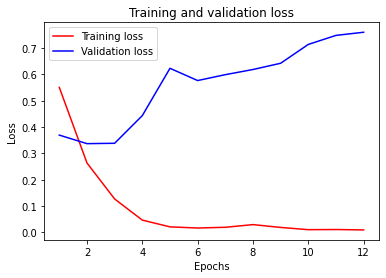

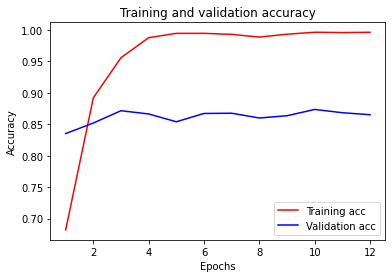

              precision    recall  f1-score   support

           0      0.823     0.930     0.873     12500
           1      0.919     0.800     0.856     12500

    accuracy                          0.865     25000
   macro avg      0.871     0.865     0.864     25000
weighted avg      0.871     0.865     0.864     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 3s 13ms/step - loss: 0.6680 - accuracy: 0.5477 - val_loss: 0.3800 - val_accuracy: 0.8356
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.3017 - accuracy: 0.8781 - val_loss: 0.3064 - val_accuracy: 0.8664
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1427 - accuracy: 0.9520 - val_loss: 0.3958 - val_accuracy: 0.8460
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.0594 - accuracy: 0.9837 - val_loss: 0.4162 - val_accuracy: 0.8688
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

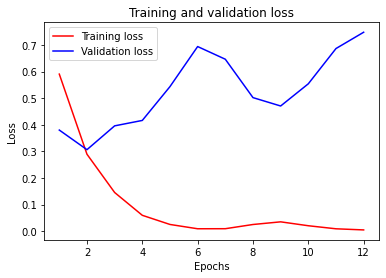

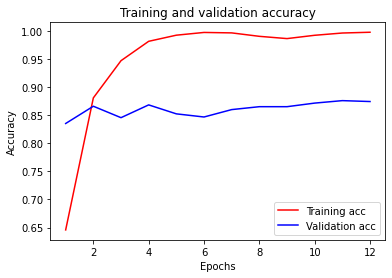

              precision    recall  f1-score   support

           0      0.857     0.895     0.876     12500
           1      0.890     0.851     0.870     12500

    accuracy                          0.873     25000
   macro avg      0.874     0.873     0.873     25000
weighted avg      0.874     0.873     0.873     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 3s 13ms/step - loss: 0.6567 - accuracy: 0.5591 - val_loss: 0.3476 - val_accuracy: 0.8548
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2862 - accuracy: 0.8813 - val_loss: 0.2848 - val_accuracy: 0.8848
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1342 - accuracy: 0.9559 - val_loss: 0.3133 - val_accuracy: 0.8808
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0552 - accuracy: 0.9844 - val_loss: 0.4244 - val_accuracy: 0.8748
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

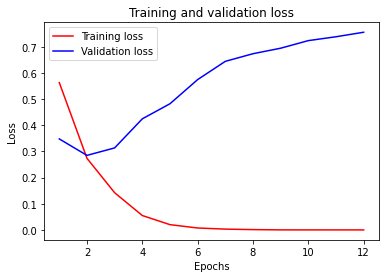

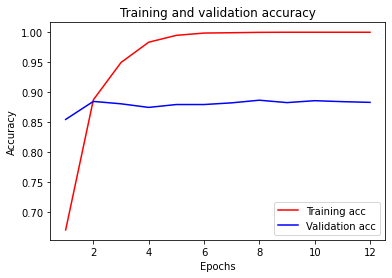

              precision    recall  f1-score   support

           0      0.867     0.890     0.878     12500
           1      0.887     0.863     0.875     12500

    accuracy                          0.876     25000
   macro avg      0.877     0.876     0.876     25000
weighted avg      0.877     0.876     0.876     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6561 - accuracy: 0.5620 - val_loss: 0.3468 - val_accuracy: 0.8544
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2715 - accuracy: 0.8910 - val_loss: 0.2920 - val_accuracy: 0.8816
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1193 - accuracy: 0.9616 - val_loss: 0.3677 - val_accuracy: 0.8700
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0548 - accuracy: 0.9848 - val_loss: 0.3942 - val_accuracy: 0.8800
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

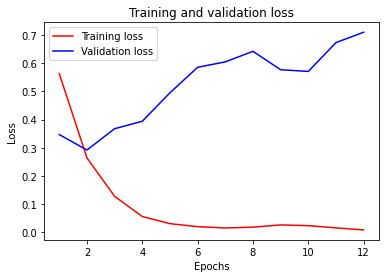

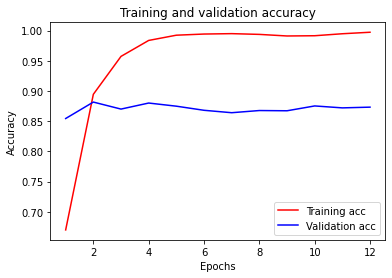

              precision    recall  f1-score   support

           0      0.896     0.854     0.874     12500
           1      0.860     0.901     0.880     12500

    accuracy                          0.877     25000
   macro avg      0.878     0.877     0.877     25000
weighted avg      0.878     0.877     0.877     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6537 - accuracy: 0.5729 - val_loss: 0.3301 - val_accuracy: 0.8604
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2598 - accuracy: 0.8985 - val_loss: 0.2947 - val_accuracy: 0.8740
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1288 - accuracy: 0.9594 - val_loss: 0.3369 - val_accuracy: 0.8664
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0557 - accuracy: 0.9846 - val_loss: 0.4290 - val_accuracy: 0.8728
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

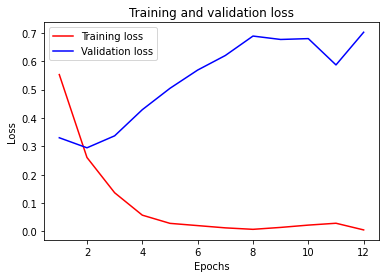

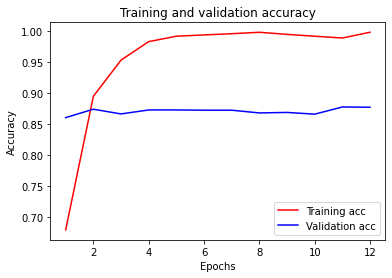

              precision    recall  f1-score   support

           0      0.857     0.906     0.881     12500
           1      0.900     0.848     0.873     12500

    accuracy                          0.877     25000
   macro avg      0.878     0.877     0.877     25000
weighted avg      0.878     0.877     0.877     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 3s 13ms/step - loss: 0.6509 - accuracy: 0.5730 - val_loss: 0.3441 - val_accuracy: 0.8568
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2711 - accuracy: 0.8939 - val_loss: 0.3328 - val_accuracy: 0.8628
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1243 - accuracy: 0.9609 - val_loss: 0.3413 - val_accuracy: 0.8708
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0483 - accuracy: 0.9875 - val_loss: 0.4003 - val_accuracy: 0.8776
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

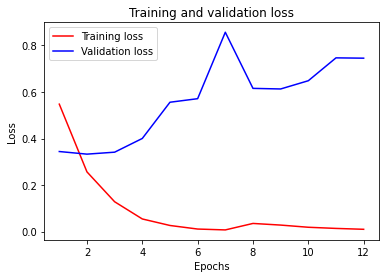

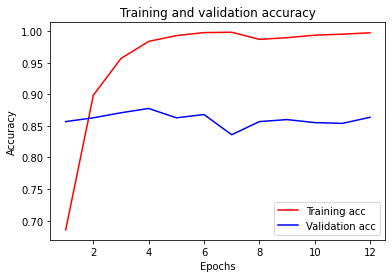

              precision    recall  f1-score   support

           0      0.926     0.799     0.858     12500
           1      0.823     0.936     0.876     12500

    accuracy                          0.868     25000
   macro avg      0.875     0.868     0.867     25000
weighted avg      0.875     0.868     0.867     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6474 - accuracy: 0.5814 - val_loss: 0.3695 - val_accuracy: 0.8360
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2814 - accuracy: 0.8873 - val_loss: 0.3675 - val_accuracy: 0.8440
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1398 - accuracy: 0.9537 - val_loss: 0.3161 - val_accuracy: 0.8780
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0600 - accuracy: 0.9837 - val_loss: 0.4023 - val_accuracy: 0.8784
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

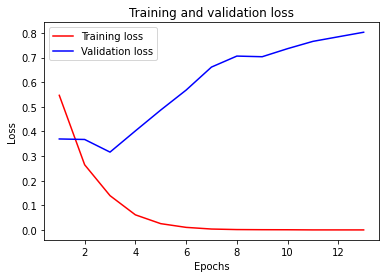

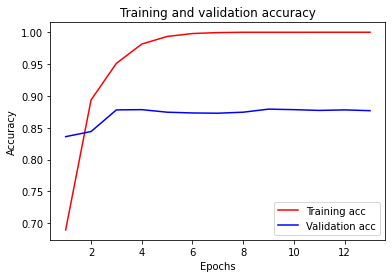

              precision    recall  f1-score   support

           0      0.887     0.864     0.875     12500
           1      0.868     0.890     0.879     12500

    accuracy                          0.877     25000
   macro avg      0.877     0.877     0.877     25000
weighted avg      0.877     0.877     0.877     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6467 - accuracy: 0.5815 - val_loss: 0.3681 - val_accuracy: 0.8400
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.2759 - accuracy: 0.8871 - val_loss: 0.2932 - val_accuracy: 0.8772
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1402 - accuracy: 0.9557 - val_loss: 0.3023 - val_accuracy: 0.8860
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0681 - accuracy: 0.9824 - val_loss: 0.3871 - val_accuracy: 0.8716
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

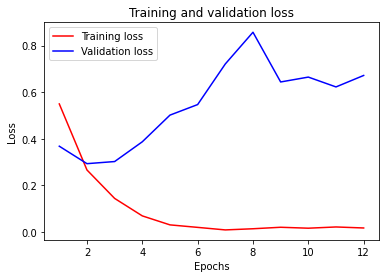

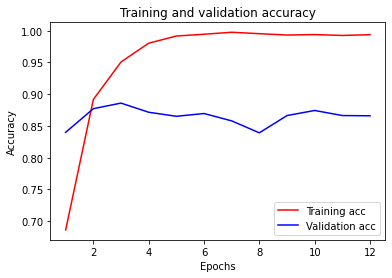

              precision    recall  f1-score   support

           0      0.879     0.880     0.879     12500
           1      0.880     0.879     0.879     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6665 - accuracy: 0.5395 - val_loss: 0.3589 - val_accuracy: 0.8388
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.3004 - accuracy: 0.8711 - val_loss: 0.2742 - val_accuracy: 0.8908
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1422 - accuracy: 0.9532 - val_loss: 0.3476 - val_accuracy: 0.8636
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0679 - accuracy: 0.9816 - val_loss: 0.3943 - val_accuracy: 0.8664
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0

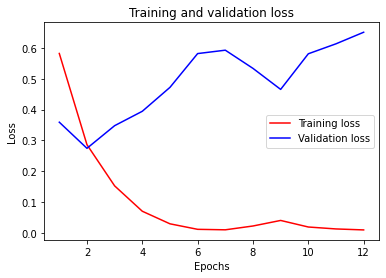

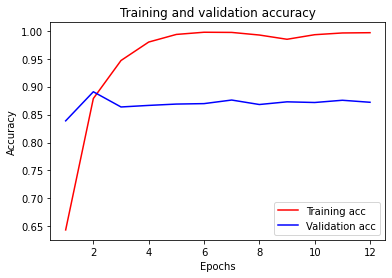

              precision    recall  f1-score   support

           0      0.882     0.868     0.875     12500
           1      0.870     0.884     0.877     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6751 - accuracy: 0.5264 - val_loss: 0.3720 - val_accuracy: 0.8340
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - loss: 0.3109 - accuracy: 0.8680 - val_loss: 0.2937 - val_accuracy: 0.8808
Epoch 3/100
176/176 [==============================] - 2s 12ms/step - loss: 0.1416 - accuracy: 0.9514 - val_loss: 0.3034 - val_accuracy: 0.8780
Epoch 4/100
176/176 [==============================] - 2s 12ms/step - loss: 0.0674 - accuracy: 0.9806 - val_loss: 0.4006 - val_accuracy: 0.8744
Epoch 5/100
176/176 [==============================] - 2s 12ms/step - loss: 0.

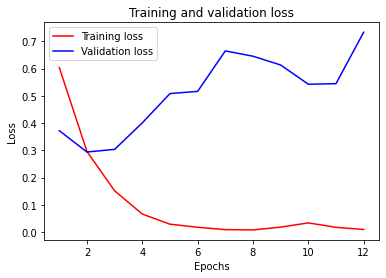

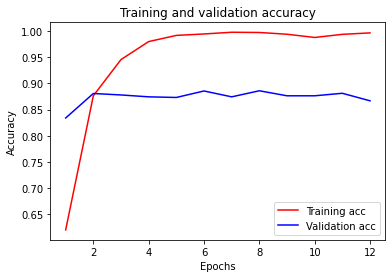

              precision    recall  f1-score   support

           0      0.839     0.910     0.873     12500
           1      0.902     0.826     0.862     12500

    accuracy                          0.868     25000
   macro avg      0.870     0.868     0.867     25000
weighted avg      0.870     0.868     0.867     25000


Average accuracy: 0.8737 (+/- 0.0048)
Average loss: 0.3024 (+/- 0.0113)
Average F1: 0.8727 (+/- 0.0077)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    GlobalMaxPool1D(),
    Flatten(),
    # Hidden layers
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    Dense(units=250, activation="relu"),
    Dropout(rate=0.2, noise_shape=None, seed=None),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
